In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn import linear_model

In [10]:
data_path = '/Users/joshua/Development/machine-learning/data/HousePriceData/train.csv'
home_data = pd.read_csv(data_path)
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
home_data_subset = home_data[['LotArea', 'SalePrice']]
home_data_subset.columns = ['X', 'Y']
home_data_subset.head()

,X,Y
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


Text(0.5, 10.255999999999993, 'Independent / Lot Size')

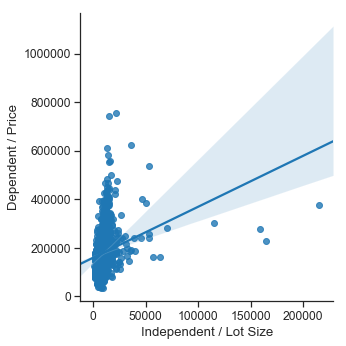

In [16]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('X','Y', data=home_data_subset)
plt.ylabel('Dependent / Price')
plt.xlabel('Independent / Lot Size')

In [17]:
linear = linear_model.LinearRegression()

In [31]:
train_x = np.asarray(home_data_subset['X'][50:])
train_y = np.asarray(home_data_subset['Y'][50:])
test_x = np.asarray(home_data_subset['X'][:50])
test_y = np.asarray(home_data_subset['Y'][:50])
train_x

array([13869,  6240,  8472, ...,  9042,  9717,  9937])

In [34]:
train_x = train_x.reshape(-1,1)
train_y = train_y.reshape(-1,1)
test_x = test_x.reshape(-1,1)
test_y = test_y.reshape(-1,1)
train_x

array([[13869],
       [ 6240],
       [ 8472],
       ...,
       [ 9042],
       [ 9717],
       [ 9937]])

In [37]:
linear.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
print('Slocpe Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('R² Value: \n', linear.score(train_x, train_y))

Slocpe Coefficient: 
 [[2.07427051]]
Intercept: 
 [159108.24225619]
R² Value: 
 0.06967635721138532


In [43]:
predicted = linear.predict(test_x)
predicted[:5]

array([[176635.82805561],
       [179021.23914074],
       [182443.78548027],
       [178917.5256153 ],
       [188687.33971178]])